**Linear Regression Import Statements**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

**Data Pre-Processing (for both models)**

In [3]:
# Data Path
data_path = "new-realtor-dataset.csv"

# Read the data
data = pd.read_csv(data_path)

# Handling Missing Values (fill in missing values with mean)
imputer = SimpleImputer(strategy="mean")
data = imputer.fit_transform(data)

# Data Partitioning (separate irrelavant values (entry number) and target value)
X = data[:, 1:-1]  # Features
y = data[:, -1]    # Target (price)

# Data scaling (normalizing data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Polynomial Features (2 degrees for every feature. Attempts to capture non-linear relationships)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

**Linear Regression Model Training, and Evaluation**

Final Train MSE: 156257.13769221163
Final Train R2 Score: 0.8483270168406901
Final Test MSE: 155902.7442793809
Final Test R2 Score: 0.8568122502503885


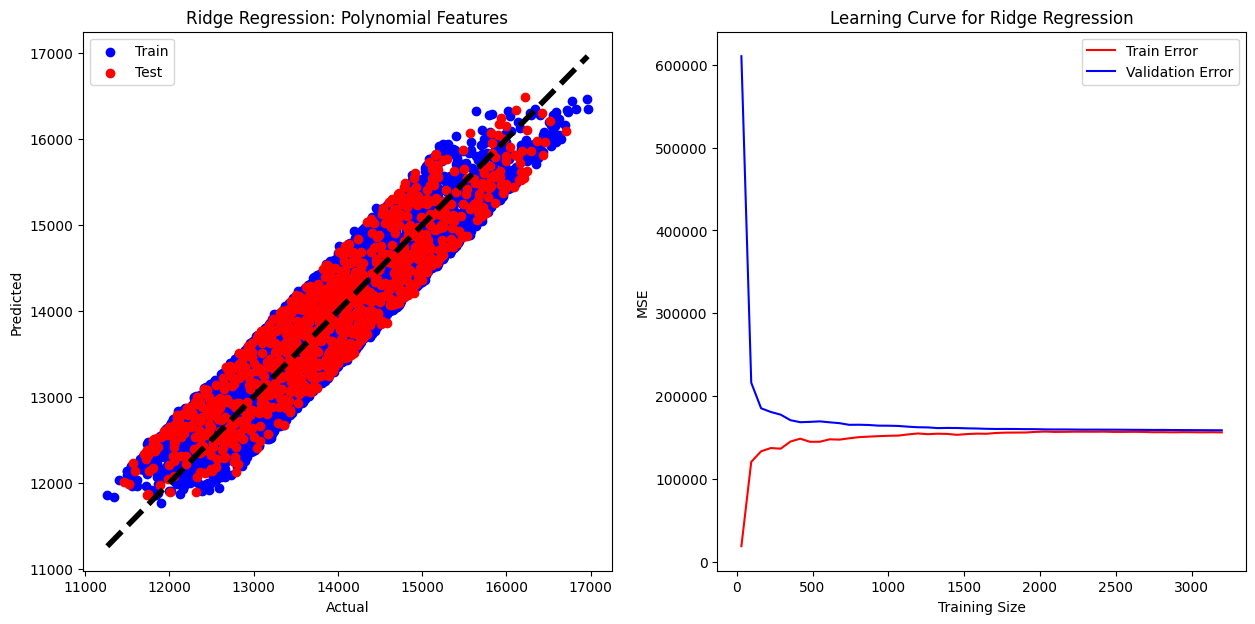

In [4]:
# Linear Regression with Ridge Regularization
model = Ridge(alpha=1.0)
model.fit(X_train_poly, y_train)

# Predictions and Evaluation
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Printing the final MSE and R2 Score for training data
print(f'Final Train MSE: {train_mse}')
print(f'Final Train R2 Score: {train_r2}')

# Printing the final MSE and R2 Score for test data
print(f'Final Test MSE: {test_mse}')
print(f'Final Test R2 Score: {test_r2}')



# Plot results
plt.figure(figsize=(15, 7))

# Prediction Accuracy Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Polynomial Features')
plt.legend()

# Plotting the Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_poly, y_train, train_sizes=np.linspace(0.01, 1.0, 50),
    scoring="neg_mean_squared_error", cv=5
)

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_errors, 'r-', label='Train Error')
plt.plot(train_sizes, test_errors, 'b-', label='Validation Error')
plt.title('Learning Curve for Ridge Regression')
plt.xlabel('Training Size')
plt.ylabel('MSE')
plt.legend()

plt.show()

**Feed Forward Neural Network Implementation**

**Feed Forward Neural Network Import Statements**

In [5]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, r2_score
from keras.regularizers import l2
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

**NN Architecture**
* Input Layer: #features in X_train.
* First Hidden Layer: 32 Neurons with ReLU activation function.
* Second Hidden Layer: 16 Neurons with Relu activation function.
* Output Layer: Sinle Neuron.

In [6]:
# Model architecture of size 32 in the first hidden layer, 16 in the second hidden layer and 1 output
model_nn = Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

# Compile the model with a moderate learning rate. Adaptive Learning rate with Adam
'''
"Adam tweaks the gradient descent method by considering the moving average of the first and second-order moments of the gradient" - https://towardsdatascience.com/the-math-behind-adam-optimizer-c41407efe59b#:~:text=Adam%20tweaks%20the%20gradient%20descent,the%20characteristics%20of%20the%20data.
'''
model_nn.compile(optimizer=Adam(learning_rate=0.01),  # Start with a larger learning rate (Adaptive Moment Estimation)
                 loss='mean_squared_error',
                 metrics=['mean_squared_error'])

# Early stopping. If there is no improvement in the loss of the model, no point in continuing
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


**Neural Network Model Training, Evaluation, and Plotting**

Epoch 1/100
100/100 [==============================] - 1s 4ms/step - loss: 184014960.0000 - mean_squared_error: 184014960.0000 - val_loss: 148871296.0000 - val_mean_squared_error: 148871296.0000
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 59649600.0000 - mean_squared_error: 59649600.0000 - val_loss: 2842597.7500 - val_mean_squared_error: 2842597.7500
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 1982672.8750 - mean_squared_error: 1982672.8750 - val_loss: 1612059.2500 - val_mean_squared_error: 1612059.2500
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 1570942.6250 - mean_squared_error: 1570942.6250 - val_loss: 1368706.2500 - val_mean_squared_error: 1368706.2500
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 1341427.3750 - mean_squared_error: 1341427.3750 - val_loss: 1166428.8750 - val_mean_squared_error: 1166428.8750
Epoch 6/100
100/100 [==============================] - 

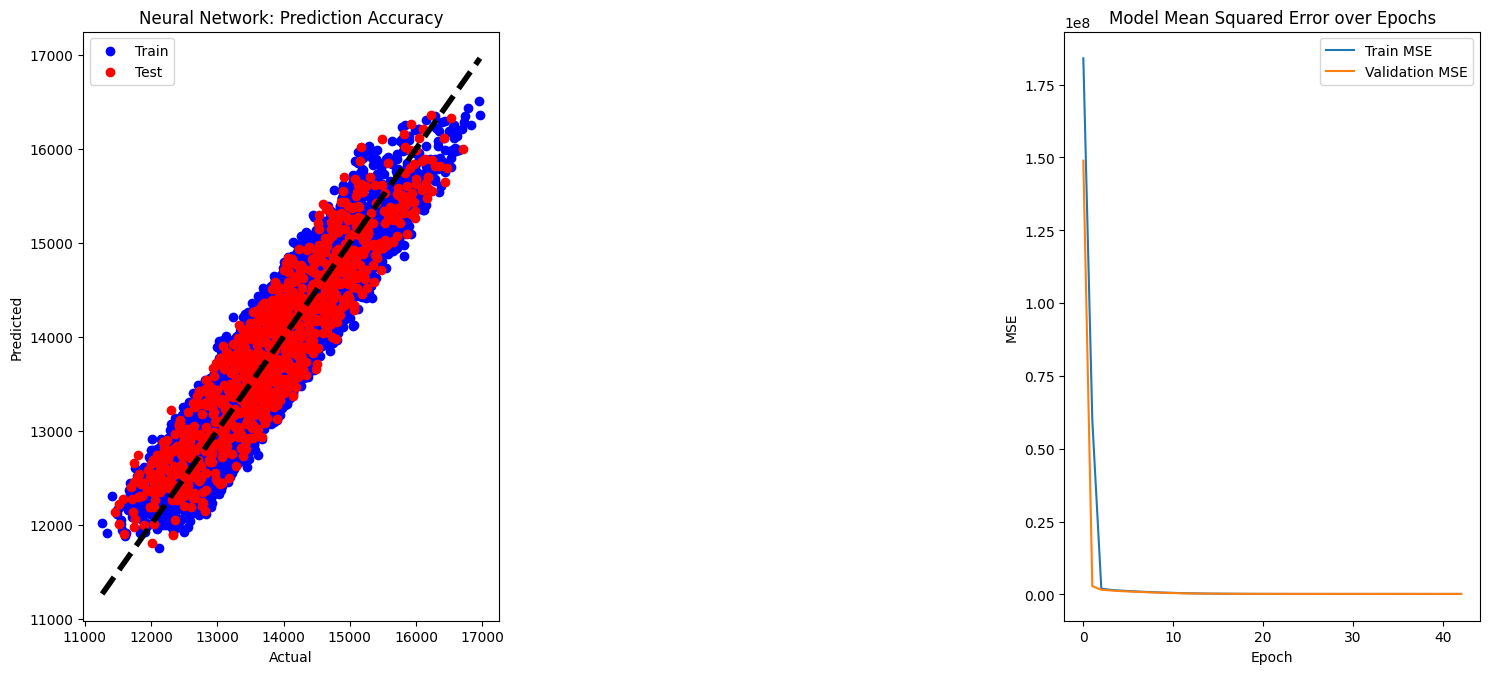

In [7]:
# Train the neural network model with early stopping
history = model_nn.fit(X_train, y_train,
                       epochs=100,
                       validation_split=0.2,
                       verbose=1,
                       callbacks=[early_stopping])

# Generate predictions for both training and test sets
y_train_pred_nn = model_nn.predict(X_train).flatten()
y_test_pred_nn = model_nn.predict(X_test).flatten()

# Evaluate the model on the test data to get the final test MSE
test_loss, test_mse = model_nn.evaluate(X_test, y_test, verbose=0)

# Calculate R2 score for both training and test sets
train_r2_nn = r2_score(y_train, y_train_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Print the final MSE and R2 Score
print(f'Final Train MSE: {mean_squared_error(y_train, y_train_pred_nn)}')
print(f'Final Train R2 Score: {train_r2_nn}')
print(f'Final Test MSE: {test_mse}')
print(f'Final Test R2 Score: {test_r2_nn}')

# Generate plots for accuracy and the learning curve for the neural network
plt.figure(figsize=(15, 7))

# Plotting the prediction accuracy
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred_nn, color='blue', label='Train')
plt.scatter(y_test, y_test_pred_nn, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Neural Network: Prediction Accuracy')
plt.legend()


# Plotting the model mean squared error
plt.subplot(1, 3, 3)
plt.plot(history.history['mean_squared_error'], label='Train MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()